In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
class BoundingBox:
    def __init__(self, origin_x, origin_y, width, height):
        self.origin = np.array([origin_x, origin_y], dtype=np.float)
        self.size = np.array([width, height], dtype=np.float)
        
    @classmethod
    def fromNumPy(cls, origin, size):
        return cls(origin[0], origin[1], size[0], size[1])

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'BoundingBox(origin=%s, size=%s, center=%s)' % (self.origin, self.size, self.center())
    
    def center(self):
        return self.origin + self.size / 2

In [3]:
class BoundingBoxTransform:
    def __init__(self, translation_x, translation_y, scale_x, scale_y):
        self.translation = np.array([translation_x, translation_y], dtype=np.float)
        self.scale = np.array([scale_x, scale_y], dtype=np.float)
    
    @classmethod
    def fromNumPy(cls, translation, scale):
        'Return aTb'
        return cls(translation[0], translation[1], scale[0], scale[1])
        
    @classmethod
    def fromTwoBoundingBoxes(cls, bbxA, bbxB):
        'Return aTb'
        return cls.fromNumPy((bbxB.origin - bbxA.origin)/bbxA.size, bbxB.size/bbxA.size)

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'BoundingBox(translation=%s, scale=%s)' % (self.translation, self.scale)
    
    def matrix(self):
        'Returns the transformation matrix'
        tfm = np.identity(3, dtype=np.float)
        tfm[:2, 2] = self.translation
#         tfm.diagonal()[:2] = self.scale
        tfm[0,0] = self.scale[0]
        tfm[1,1] = self.scale[1]
        return tfm

In [4]:
def getTightBBox(image):
    alpha = image[:,:,3].astype(bool)
    nonzero_idxs = np.nonzero(alpha)
    left = nonzero_idxs[1].min()
    right = nonzero_idxs[1].max() + 1
    top = nonzero_idxs[0].min()
    bottom = nonzero_idxs[0].max() + 1
    w = right - left
    h = bottom - top
    return BoundingBox(left, top, w, h)

In [5]:
def getRGBImage(image_):
    if image_.ndim == 3:
        if image_.shape[2] == 3:
            image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
        elif image_.shape[2] == 4:
            image = cv2.cvtColor(image_, cv2.COLOR_BGRA2RGBA)
        else:
            image = image_
    else:
        image = image_
    return image

In [6]:
def getRectanglePatch(bbx, linewidth=1, edgecolor='r'):
    origin = np.floor(bbx.origin).astype(np.int)
    return plt.Rectangle(origin, bbx.size[0], bbx.size[1], fill=False, linewidth = linewidth, edgecolor = edgecolor)

In [7]:
d_img = cv2.imread('../build/02.png',cv2.IMREAD_UNCHANGED)
amodal_bbx = getTightBBox(d_img)
print 'amodal_bbx=', amodal_bbx
print 'apect_ratio=', amodal_bbx.size[0] / amodal_bbx.size[1]

amodal_bbx= BoundingBox(origin=[ 402.  247.], size=[ 156.   47.], center=[ 480.   270.5])
apect_ratio= 3.31914893617


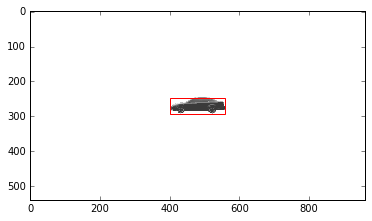

In [8]:
fig,ax = plt.subplots(1)
ax.imshow(getRGBImage(d_img))
ax.add_patch(getRectanglePatch(amodal_bbx, edgecolor='r'))
plt.show()

In [10]:
print 256.295248/90, 191.595800/67
print 563.980347/198, 399.110594/139
print 936.566351/327, 254.695963/89
print 276.796902/96, 75.639695/26
print 462.783401/162, 126.085484/44
print 446.793259/156, 134.133321/47

2.84772497778 2.85963880597
2.84838559091 2.87129923741
2.86411728135 2.86175239326
2.8833010625 2.90921903846
2.85668766049 2.86557918182
2.86405935256 2.85390044681


In [ ]:
# Average seems to be 2.86